# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 93.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 28.1MB/s]


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

1) Посмотрим 5 случайных строчек данных:

In [6]:
data.sample(5) # просмотр 5 случайных строк данных

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1767,1,20.50,20.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3225,27,94.55,2724.6,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,1
4827,61,51.35,3244.4,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
4129,43,34.00,1505.35,Female,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0
63,1,48.45,48.45,Female,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0


2)Проанализируем данные на предмет совпадения типов и незаполненных ячеек:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Можно заметить, что признак TotalSpent является типом object, хотя должен быть float64. Это означает, что в некоторых семплах, вероятно, существует символ пробела, который нельзя преобразовать к типу float. Проверим это:

In [8]:
data.index[data['TotalSpent'] == ' '].tolist()

[1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598]

Заменим данные пустые значения на NaN, после чего удалим их и изменим тип TotalSpent на float:

In [9]:
data = data.replace(' ', np.nan)
data = data.dropna()
data['TotalSpent'] = data.loc[:,'TotalSpent'].astype(float)

Создадим таблицу с количеством NaN в каждой колонке:

In [10]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1)Построим гистограмму для численных признаков:

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

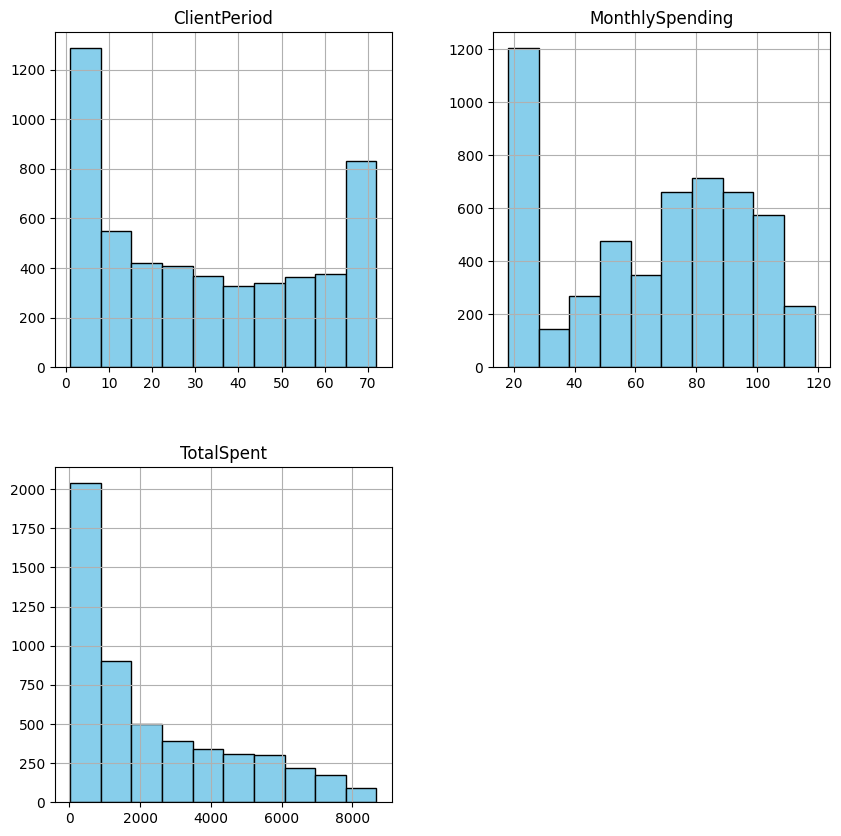

In [11]:
data.hist(column=num_cols, figsize=(10,10), color='skyblue', edgecolor='black')

Построим распределение каждого категориального признака:

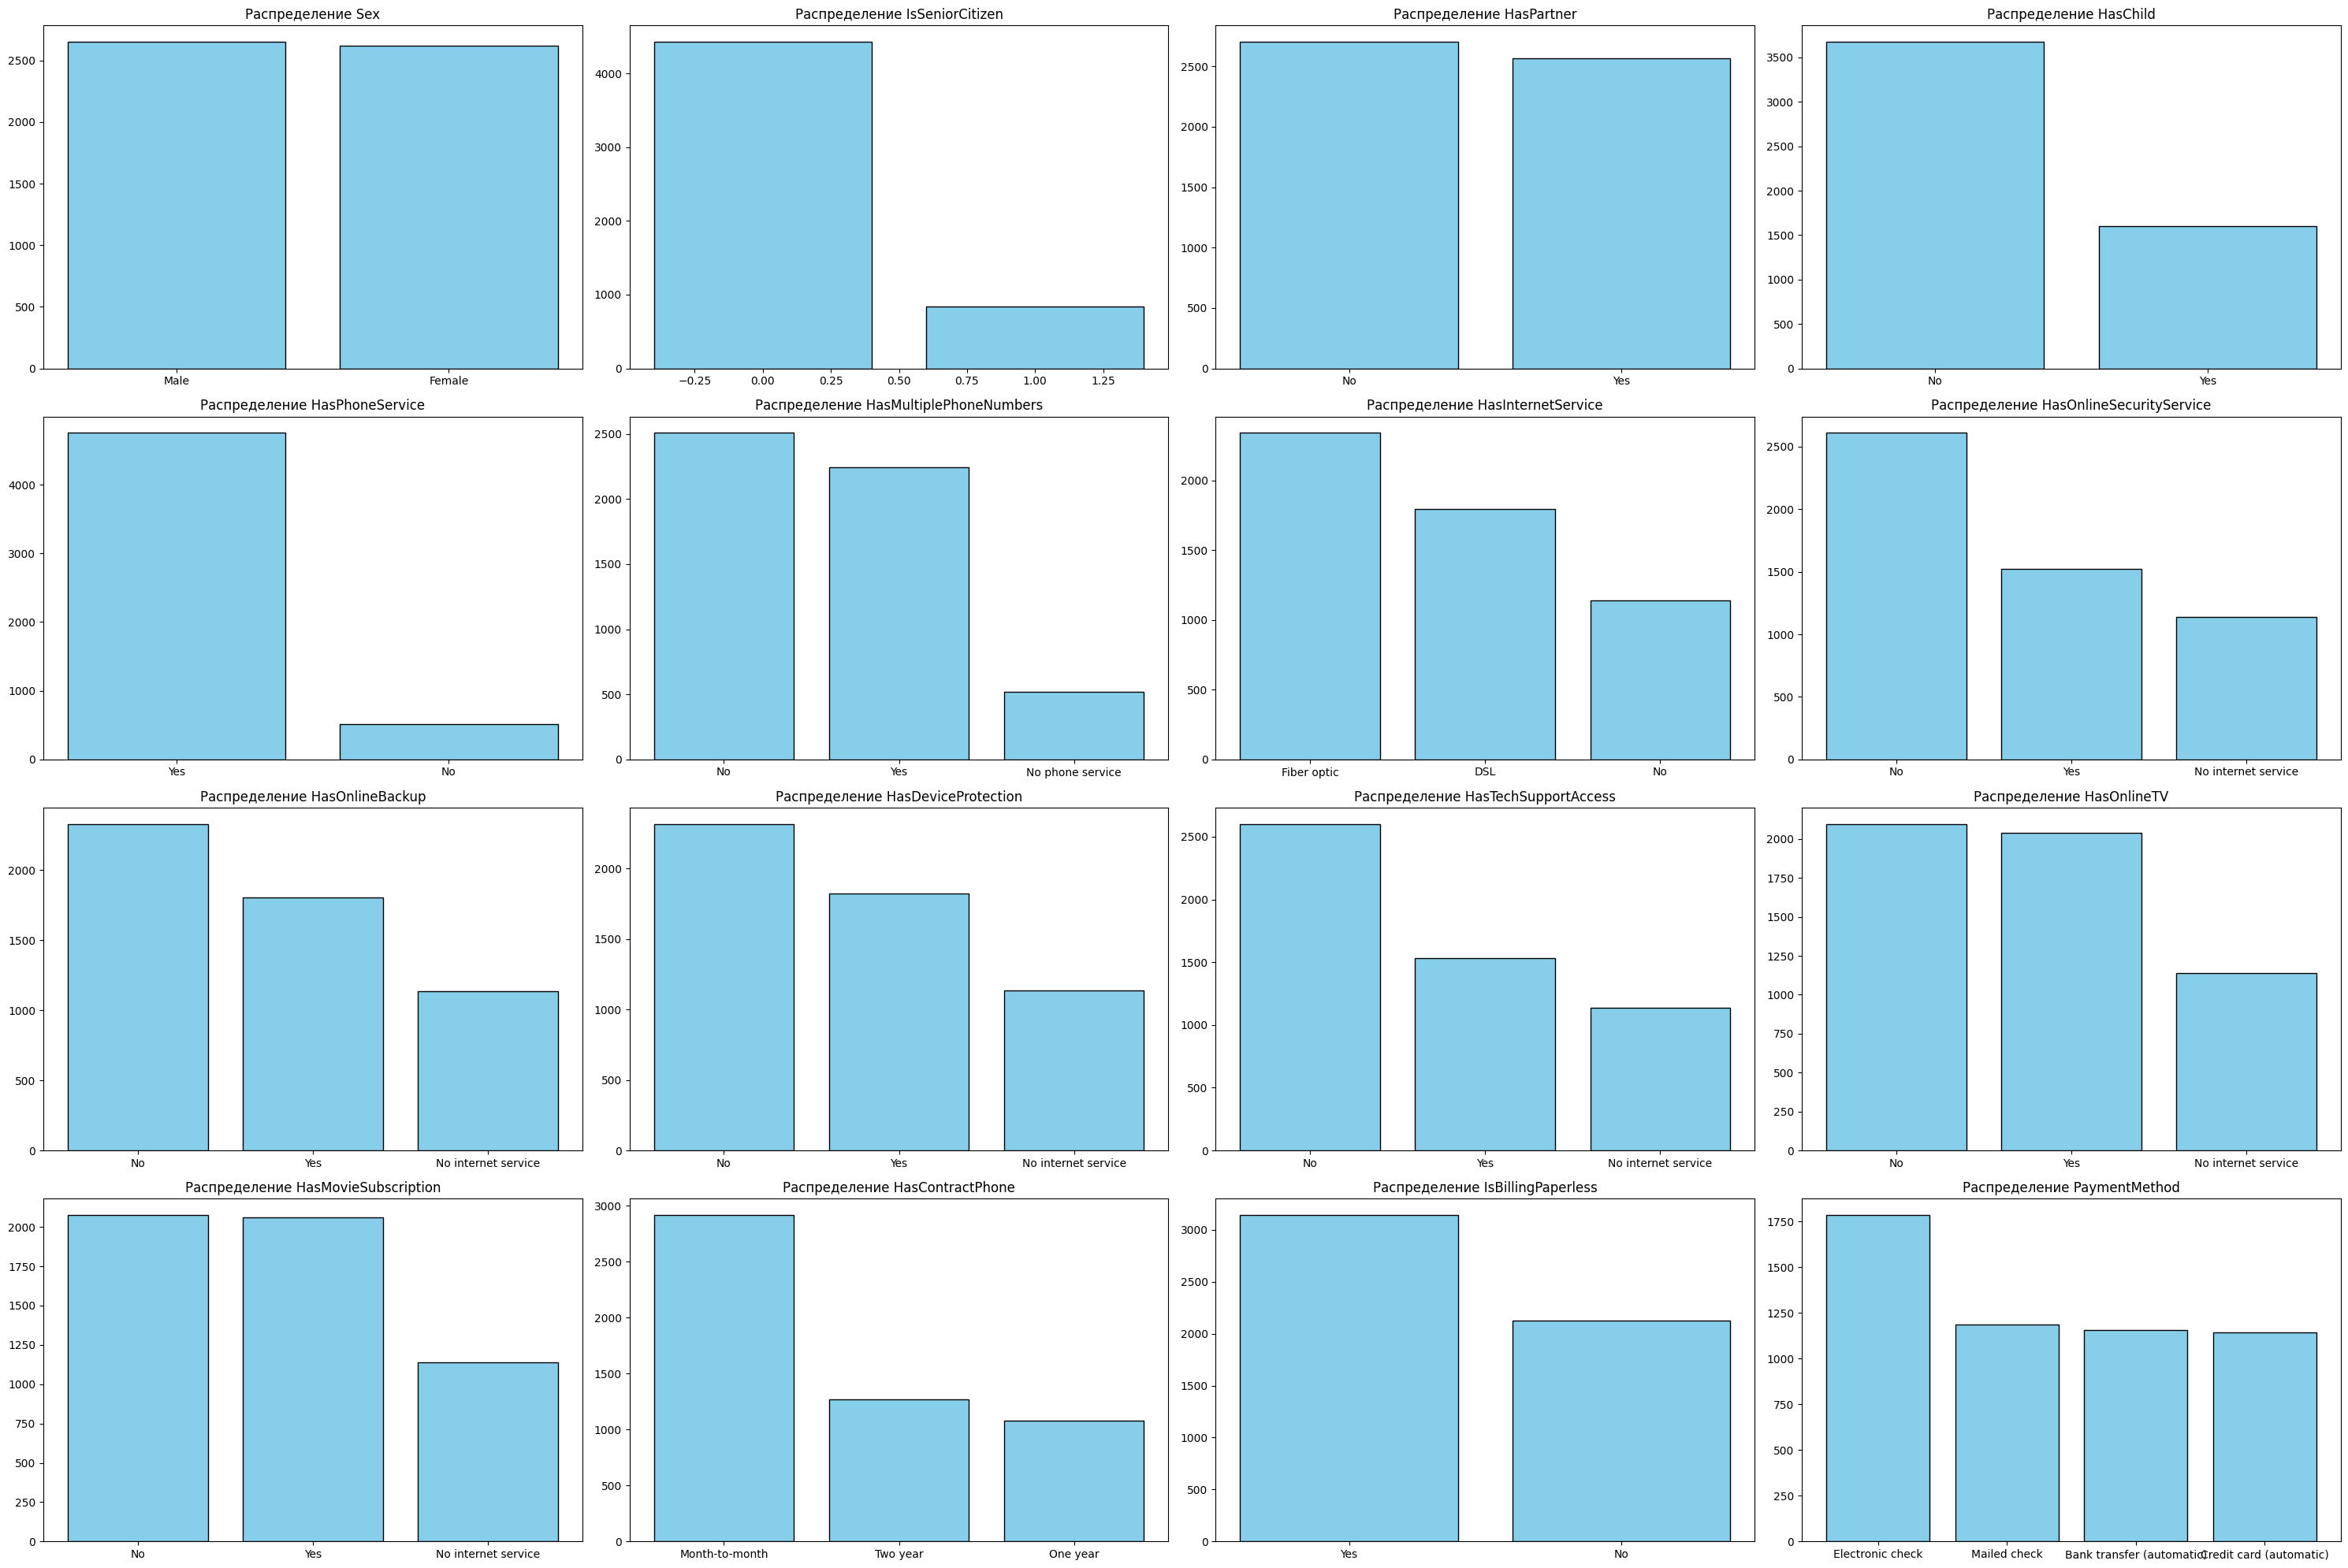

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=len(cat_cols)//4, figsize=(30, 20))

for col, ax in zip(cat_cols, axes.flatten()):
    counts = data[col].value_counts()
    ax.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    ax.set_title(f'Распределение {col}')

plt.tight_layout()
plt.show()

2)Посмотрим на распределение целевой переменной:

In [13]:
data[target_col].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

В данном случае можно сказать, что классы сбалансированы, ведь объектов 1 класса всего в 3 раза меньше чем объектов класса 0.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

1)Обработаем данные при помощи ColumnTransformer, который создаёт конвейер преобразования числовых и категориальных данных:

In [15]:
X = data.drop(columns=[target_col])
y = data[target_col]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)


2)Создадим пайплайн, куда поместим этап преобразования данных и логистическую регрессию, после чего передадим пайплайн в GridSearchCV для кроссвалидации:

In [16]:
clf = make_pipeline(
    preprocessor,
    LogisticRegressionCV(scoring='roc_auc', refit=True)
)

param_grid = {
    'logisticregressioncv__Cs': [100, 10, 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

print('Лучшие параметры:', grid_search.best_params_)
print('Качество ROC_AUC на train данных:', grid_search.best_score_)

roc_auc_test = grid_search.score(X_test, y_test)

print('Качество ROC_AUC на test данных:', roc_auc_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1760, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-

Лучшие параметры: {'logisticregressioncv__Cs': 100}
Качество ROC_AUC на train данных: 0.8447518678035433
Качество ROC_AUC на test данных: 0.8442321302193914


Полученнные результаты:



> При test_size = 0.4:
* Лучший параметр C = 100
* Качество ROC_AUC на train данных: 0.8500835736805497
* Качество ROC_AUC на test данных: 0.834283753933831


> При test_size = 0.5:
* Лучший параметр C = 100
* Качество ROC_AUC на train данных: 0.8540159018140215
* Качество ROC_AUC на test данных: 0.8331679881790702

> При test_size = 0.2:
* Лучший параметр C = 100
* Качество ROC_AUC на train данных: 0.8447518678035433
* Качество ROC_AUC на test данных:  **0.8442321302193914**

Лучшие значения при test_size = 0.2 : 0.8442321302193914

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [17]:
!pip install catboost

In [18]:
import catboost

1)Разделим выборку на train/valid и протестируем catboost со стандартными параметрами:

In [19]:
X_train_origin, X_test_origin, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print("Качество ROC_AUC на train данных с catboost: ", train_auc)
print("Качество ROC_AUC на test данных с catboost: ", test_auc)


Learning rate set to 0.019048
0:	learn: 0.6801499	total: 64.9ms	remaining: 1m 4s
1:	learn: 0.6683861	total: 79.3ms	remaining: 39.6s
2:	learn: 0.6574055	total: 90.5ms	remaining: 30.1s
3:	learn: 0.6459140	total: 105ms	remaining: 26.3s
4:	learn: 0.6353605	total: 122ms	remaining: 24.4s
5:	learn: 0.6261610	total: 133ms	remaining: 22.1s
6:	learn: 0.6167841	total: 146ms	remaining: 20.7s
7:	learn: 0.6080311	total: 158ms	remaining: 19.6s
8:	learn: 0.5997483	total: 171ms	remaining: 18.9s
9:	learn: 0.5918432	total: 185ms	remaining: 18.3s
10:	learn: 0.5839242	total: 199ms	remaining: 17.8s
11:	learn: 0.5766678	total: 212ms	remaining: 17.4s
12:	learn: 0.5701751	total: 220ms	remaining: 16.7s
13:	learn: 0.5631203	total: 233ms	remaining: 16.4s
14:	learn: 0.5566815	total: 245ms	remaining: 16.1s
15:	learn: 0.5507060	total: 258ms	remaining: 15.9s
16:	learn: 0.5449043	total: 272ms	remaining: 15.7s
17:	learn: 0.5390888	total: 285ms	remaining: 15.5s
18:	learn: 0.5338561	total: 300ms	remaining: 15.5s
19:	lear

При стандартных параметрах catboost получаем:


*   Качество ROC_AUC на train данных с catboost:  0.8934524745969756
*   Качество ROC_AUC на test данных с catboost:  0.8404411417787214



2)Протестируем разные значения параметров количества деревьев и learning_rate:

In [21]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,n_estimators=1000, learning_rate=0.001)
boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print("Качество ROC_AUC на train данных с catboost: ", train_auc)
print("Качество ROC_AUC на test данных с catboost: ", test_auc)

0:	learn: 0.6924544	total: 31ms	remaining: 31s
1:	learn: 0.6917970	total: 60.1ms	remaining: 30s
2:	learn: 0.6911536	total: 81.8ms	remaining: 27.2s
3:	learn: 0.6904504	total: 108ms	remaining: 27s
4:	learn: 0.6897702	total: 139ms	remaining: 27.7s
5:	learn: 0.6891433	total: 169ms	remaining: 28s
6:	learn: 0.6884976	total: 198ms	remaining: 28.1s
7:	learn: 0.6878403	total: 216ms	remaining: 26.8s
8:	learn: 0.6871655	total: 238ms	remaining: 26.3s
9:	learn: 0.6865075	total: 268ms	remaining: 26.6s
10:	learn: 0.6858435	total: 296ms	remaining: 26.6s
11:	learn: 0.6851999	total: 324ms	remaining: 26.6s
12:	learn: 0.6845147	total: 352ms	remaining: 26.7s
13:	learn: 0.6838434	total: 381ms	remaining: 26.8s
14:	learn: 0.6831787	total: 413ms	remaining: 27.1s
15:	learn: 0.6825209	total: 442ms	remaining: 27.2s
16:	learn: 0.6818752	total: 466ms	remaining: 26.9s
17:	learn: 0.6812142	total: 499ms	remaining: 27.2s
18:	learn: 0.6805798	total: 518ms	remaining: 26.7s
19:	learn: 0.6799468	total: 544ms	remaining: 26.



> При n_estimators = 500 и learning_rate = 0.1:


*   Качество ROC_AUC на train данных с catboost:  0.940556084463899
*   Качество ROC_AUC на test данных с catboost:  0.8302170323189432


> При n_estimators = 1000 и learning_rate = 0.01:


*   Качество ROC_AUC на train данных с catboost:  0.8764853134427807
*   Качество ROC_AUC на test данных с catboost:  0.841441377683416

Варьируя различные параметры, удалось получить значение на test данных, равное 0.841441377683416

# Предсказания

Избавимся от пропусков в признаке TotalSpent и приведём его к типу float:

In [22]:
best_model = grid_search.best_estimator_
X_test = pd.read_csv('./test.csv')
most_common_value = X_test['TotalSpent'].mode()[0]
X_test = X_test.replace(' ', most_common_value)
X_test['TotalSpent'] = X_test.loc[:,'TotalSpent'].astype(float)

In [23]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)